# TITANIC, PREDICCIóN DE SOBREVIVIENTES
___


## INTRODUCCIÓN: 

En esta competencia, se tiene dos conjuntos de datos similares que incluyen información del pasajero como nombre, edad, género, clase socioeconómica, etc. Uno conjunto de datos se titula train.csv y el otro se titulatest.csv la diferencia principal de estos conjuntos es que Train.csv contendrá los detalles de un subconjunto de pasajeros a bordo (891 para ser exactos) y, lo que es más importante, revelará si sobrevivieron o no, también conocido como la "verdad terrestre". Mientras que El conjunto de datos **test.csv** contiene información similar (de 418 pasajero) pero **no revela la" verdad en tierra "para cada pasajero, es decir si sobrevivieron. Es su trabajo predecir estos resultados.**

El problema puede ser resuelto mediante algoritmos de aprendizaje por lo que es apto para el uso de Machine Learning. Por ser 
tener datos etiquetados, es decir, datos para los que ya conoce la respuesta de destino y trata de buscar patrones relacionándolos con un campo especial, llamado objetivo, dadas unas variables de entrada. Dentro de los Algoritmos de Machine Learning corresponde a un ejercicio de aprendizaje supervisado. En este trabajo se esta en busca de respuestas discretas, es decir con un conjunto finito de resultados posibles (sobrevive o no sobrevive) siendo del tipo claisficacion. Resumiendo se aplicara algoritmos de Machine Learning, de aprendizaje superfizad, del tipo clasificacion.


El informe contendra el siguietne contenido:

1. IMPORTACIÓN LIBRERIAS A USAR Y DEFINICION DE FUNCIONES.
2. IMPORTACIÓN DE INFORMACIÓN.
3. ENTENDIMIENTO DE LA INFORMACIÓN.
4. PREPROCESAMIENTO DE LA INFORMACIÓN.
    4.A. Limpieza de la informacion (Feactures).
    4.B. Preparacion de datos para el uso de los algoritmos.
4. APLICACION DE ALGORITMOS DE MACHINE LERNING.
5. ANALISIS DE LAS PREDICCIONES.
6. RESULTADOS Y CONCLUSION.


Los algoritmos a utilizar son los sigueintes:  
1. Regresion logitica  
2. Maquina de vectores soporte
3. K-vecinos mas cercanos    
4. Naive Bayes  
5. Arbol de decision   
6. Bosque aleatorio  
7. Metodo de ensamble  




## 1. IMPORTACIÓN LIBRERIAS A USAR Y DEFINICION DE FUNCIONES

Se utilisan las siguientes librerias: 
   * Pandas
   * Numpy
   * Seaborn
   * Marplotlib
   
Las funciones definidas son unicamente para codigos que usaremos en reiteradas ocaciones

In [1]:
# Importacion de librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#importasion de funciones de Sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier 
from sklearn.metrics import confusion_matrix

# Definicion de funciones:

def concat_df(train_data, test_data):
    #  Devuelve un df concatenado del conjunto de entrenamiento y prueba.
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)


def divide_df(all_data):
    # Devuelve dfs divididos del conjunto de entrenamiento y prueba
    return all_data.loc[:890], all_data.loc[891:].drop(['Survived'], axis=1)



def bar_chart(df, feacture):
    #Grafica la cantidad de sobrevivientes y de muertos en base al datafram (df) y su columna (feacture)
    survived=df[df['Sobreviviente']==1][feacture].value_counts()
    dead=df[df['Sobreviviente']==0][feacture].value_counts()
    sobrevivencia = pd.DataFrame([survived,dead])
    sobrevivencia.index=['Sobrevivientes','Muertos']
    sobrevivencia.plot(kind='bar',stacked=True, figsize=(10,5))
    plt.title(df_train.name  +": Sobrevivencia - " + df[feacture].name )
    
def Replace_val(df, feacture):
    #Remplaza los valires unicos de la columna por numeros distintos
    original = df[feacture].unique()
    remplazo = range(0,len(df[feacture].unique()),1)
    df[feacture].replace(original , remplazo, inplace=True)
    

## 2. IMPORTACIÓN DE INFORMACIÓN
Se importa la infomacion anteriormente citada para ser trabajados como DataFrames (los datos de "Entrenamiento" y los del "Test". A su vez se define un data Frame que contenga toda conjunta para facilitar el tratamiento de la infomración.

In [2]:
# importacion de datos a utlizardesde la Web
url_train = "https://raw.githubusercontent.com/Currie32/Titanic-Kaggle-Competition/master/train.csv"
url_test = "https://raw.githubusercontent.com/Currie32/Titanic-Kaggle-Competition/master/test.csv"

# Se leen los datos
df_train = pd.read_csv(url_train)
df_test = pd.read_csv(url_test)

# se guardan los datos en la computadora
# NO CORRER SI YA FUERON GUARDADO LOS ARCHIVOS EN LA COMPUTADORA

dir_train = "Titanic_train.csv"## VER COMO CREAR UNA CARPETA Y GUARDARLO AHI
dir_test = "Titanic_test.csv"

# DESCOMENTAR PARA GUARDAR ARCHIVOS EN LA COMPU
# df_test.to_csv(dir_test)
# df_train.to_csv(dir_train)


#Importar los datos de los archivos .csv almacenados
df_train = pd.read_csv(dir_train)
df_test = pd.read_csv(dir_test)
df_all = concat_df(df_train, df_test)

#Nombra la data 
df_train.name = 'Training Set'
df_test.name = 'Test Set'
df_all.name = 'All Set' 

dfs = [df_train, df_test]

## 3. ENTENDIMIENTO DE LA INFORMACION
Se estudia la informacion base, esto consiste en:
Observar que datos contiene cada archivo y el significado de cada uno de estos.
   * La cantidad de datos totales, datos faltantes y la relacion entre estos (porcentaje de datos faltantes).
   * Tipos de datos.
   * Informacion estadistica de los datos
   * Relaciones entre las distintas variables
   * Obtener un orden de magnitud de los valores que se esperan obtener



In [3]:
# Visualizaciones de la informacion, descomentar para ver
# df_train.head()
# df_train.tail()
# df_test.head()
# df_test.tail()


#Cambio los titulos de la columna para una interpretacion mas comoda
#df_train.keys() #descomentar para ver los titulos
cabecera = ["Sin_nombre", "ID", "Sobreviviente", "Clase", "Nombre", "Sexo", "Edad","Hermanos", "Hijos", "Ticket", "Tarifa", "Cabina", "Embarque"]
df_train.columns = cabecera

#df_test.keys() #descomentar para ver los titulos
cabecera = ["Sin_nombre", "ID", "Clase", "Nombre", "Sexo", "Edad","Hermanos", "Hijos", "Ticket", "Tarifa", "Cabina", "Embarque"]
df_test.columns = cabecera

# Verificaciones

for df in dfs: 
    print ('Nombre serie de datos: {}' .format(df.name)) 

    print('Cantidad de datos: {}'.format(df.shape)) 

    print('Tipos de datos:')
    print(df.info())

    print('Datos faltantes:')
    print(pd.isnull(df).sum())

    print('Estadísticas:')
    print(df.describe(include = "all"))

# #tabla de valores faltantes de entrenamito, ya esta hecha en el anterior. aca solo hace una tabla mas bonita

for df in dfs:
    df_nul =  pd.isnull(df).sum()
    df_dat = df_train.isna().count()
    per_df_null = round(df_nul / df_dat * 100, 1)

    print("Datos de {}, Datos faltantantes: ".format(df.name))
    missing_data = pd.concat([df_nul, per_df_null], axis=1, keys=['Número de datos faltantes', '% porcentaje de datos faltantes'])
    print(missing_data)

Nombre serie de datos: Training Set
Cantidad de datos: (891, 13)
Tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sin_nombre     891 non-null    int64  
 1   ID             891 non-null    int64  
 2   Sobreviviente  891 non-null    int64  
 3   Clase          891 non-null    int64  
 4   Nombre         891 non-null    object 
 5   Sexo           891 non-null    object 
 6   Edad           714 non-null    float64
 7   Hermanos       891 non-null    int64  
 8   Hijos          891 non-null    int64  
 9   Ticket         891 non-null    object 
 10  Tarifa         891 non-null    float64
 11  Cabina         204 non-null    object 
 12  Embarque       889 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB
None
Datos faltantes:
Sin_nombre         0
ID                 0
Sobreviviente      0
Clase 

Relacion entre variables numericas:

Text(0.5, 1.0, 'Relaciones entre las variables numericas')

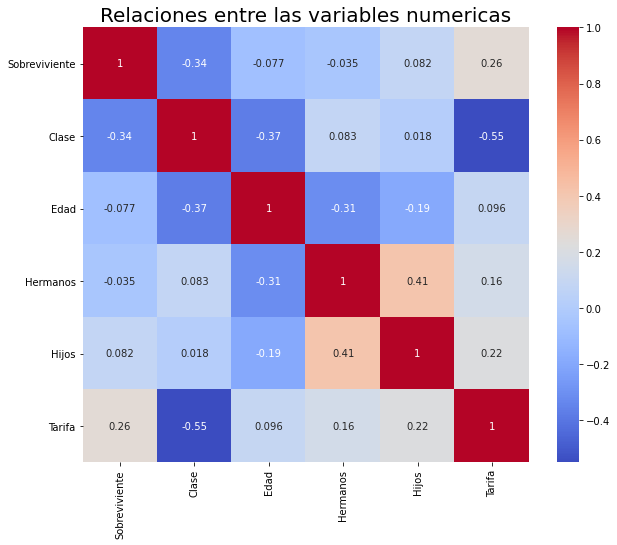

In [4]:
# Hace una correlacion de variables con un mapa de calor: 
sns.heatmap(df_train.drop(['ID','Sin_nombre'], axis=1).corr(), annot=True, cmap='coolwarm')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Relaciones entre las variables numericas', fontsize = 20)

Text(0.5, 1.0, 'Probabilidad de Sobrevivencia')

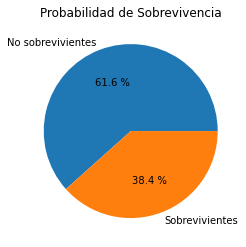

In [5]:
# Grafico supervivencia

plt.pie(df_train.Sobreviviente.value_counts(),labels=['No sobrevivientes', 'Sobrevivientes'], autopct="%0.1f %%")
plt.title('Probabilidad de Sobrevivencia')

**Algunas onclusiones**  
Faltan muy pocos datos de embarque y tarifa pero una gran cantidad de datos sobre las edades y cabinas
Se estima a simplevista que el orden de sobrevivientes esta en 38 %
Dentro de las variables numericas, con los datos en crupo parecen ser las mas relevantes la "Clase" y la "Tarifa" de cada uno


## 4. PREPROCESAMIENTO DE LA INFORMACIÓN

### 4.A. Limpieza de la informácion
Las 4 C de la limpieza de datos: corregir, completar, crear y convertir
En esta etapa, limpiaremos nuestros datos 

1) corrigiendo valores aberrantes y valores atípicos.  
2) completando la información faltante.  
3) creando nuevas características para el análisis.  
4) convirtiendo los campos al formato correcto para los cálculos y la presentación.  

Corrección: al revisar los datos, no parece haber entradas de datos aberrantes o no aceptables. Además, vemos que podemos tener valores atípicos potenciales en edad y tarifa. Sin embargo, dado que son valores razonables, esperaremos hasta que completemos nuestro análisis exploratorio para determinar si debemos incluir o excluir del conjunto de datos. Cabe señalar que si fueran valores irrazonables, por ejemplo, edad = 800 en lugar de 80, probablemente sea una decisión segura corregir ahora. Sin embargo, queremos tener cuidado cuando modificamos los datos de su valor original, porque puede ser necesario crear un modelo preciso.  
Completando: Hay valores nulos o datos faltantes en el campo de edad, cabina y embarcado. Los valores perdidos pueden ser malos, porque algunos algoritmos no saben cómo manejar valores nulos y fallarán. Mientras que otros, como los árboles de decisión, pueden manejar valores nulos. Por lo tanto, es importante corregirlo antes de comenzar a modelar, porque compararemos y contrastaremos varios modelos. Hay dos métodos comunes, eliminar el registro o completar el valor que falta con una entrada razonable. No se recomienda eliminar el registro, especialmente un gran porcentaje de registros, a menos que realmente represente un registro incompleto. En cambio, es mejor imputar los valores perdidos. Una metodología básica para los datos cualitativos es la imputación mediante el modo. Una metodología básica para los datos cuantitativos es la imputación utilizando media, mediana o media + desviación estándar aleatoria. Una metodología intermedia es utilizar la metodología básica basada en criterios específicos; como la edad media por clase o puerto de embarque por tarifa y SES. Hay metodologías más complejas; sin embargo, antes de implementarlo, se debe comparar con el modelo base para determinar si la complejidad realmente agrega valor. Para este conjunto de datos, la edad se imputará con la mediana, el atributo de cabina se eliminará y el embarque se imputará con el modo. Las iteraciones posteriores del modelo pueden modificar esta decisión para determinar si mejora la precisión del modelo.  
Creación: la ingeniería de características es cuando usamos características existentes para crear nuevas características para determinar si proporcionan nuevas señales para predecir nuestro resultado. Para este conjunto de datos, crearemos una función de título para determinar si jugó un papel en la supervivencia.  
Conversión: por último, pero no menos importante, nos ocuparemos del formato. No hay formatos de fecha o moneda, sino formatos de tipo de datos. Nuestros datos categóricos se importan como objetos, lo que dificulta los cálculos matemáticos. Para este conjunto de datos, convertiremos tipos de datos de objetos en variables ficticias categóricas

### 4.1. Nombres

Se observa que los nombres estan compuestos de la siguiente manera:  
<center>
    Apellido familia, Titulo. Nombre y apellido
</center>   

Para el caso particular de las señoras casadas difiere un poco siendo:  
<center>
Apellido familia, Titulo. Nombre y apellido del marido ( nombre y apellido propio)   
</center> 

Pudiendo de esta informacion sacar los siguientes datos relevantes, el titulo y en casa de estar la pareja de casados tambien se puede obtener dicha informacion.

#### 4.1.1. Titulos
Se prosede a la obtencion de los titulos, para esto se generan los titulos, se hace una observacion de los titulos actuales y luego se los agrupara segun corresponda.

Edad                         Sobreviviente
             count       mean    min   max          mean
Titulo                                                  
Capt             1  70.000000  70.00  70.0      0.000000
Col              4  54.000000  47.00  60.0      0.500000
Don              1  40.000000  40.00  40.0      0.000000
Dona             1  39.000000  39.00  39.0           NaN
Dr               7  43.571429  23.00  54.0      0.428571
Jonkheer         1  38.000000  38.00  38.0      0.000000
Lady             1  48.000000  48.00  48.0      1.000000
Major            2  48.500000  45.00  52.0      0.500000
Master          53   5.482642   0.33  14.5      0.575000
Miss           210  21.774238   0.17  63.0      0.697802
Mlle             2  24.000000  24.00  24.0      1.000000
Mme              1  24.000000  24.00  24.0      1.000000
Mr             581  32.252151  11.00  80.0      0.156673
Mrs            170  36.994118  14.00  76.0      0.792000
Ms               1  28.000000  28.00  28.0      1.000000
Rev              8  41.250000  27.00  57.0      0.000000
Sir              1  49.000000  49.00  49.0      1.000000
the Countess     1  33.000000  33.00  33.0      1.000000

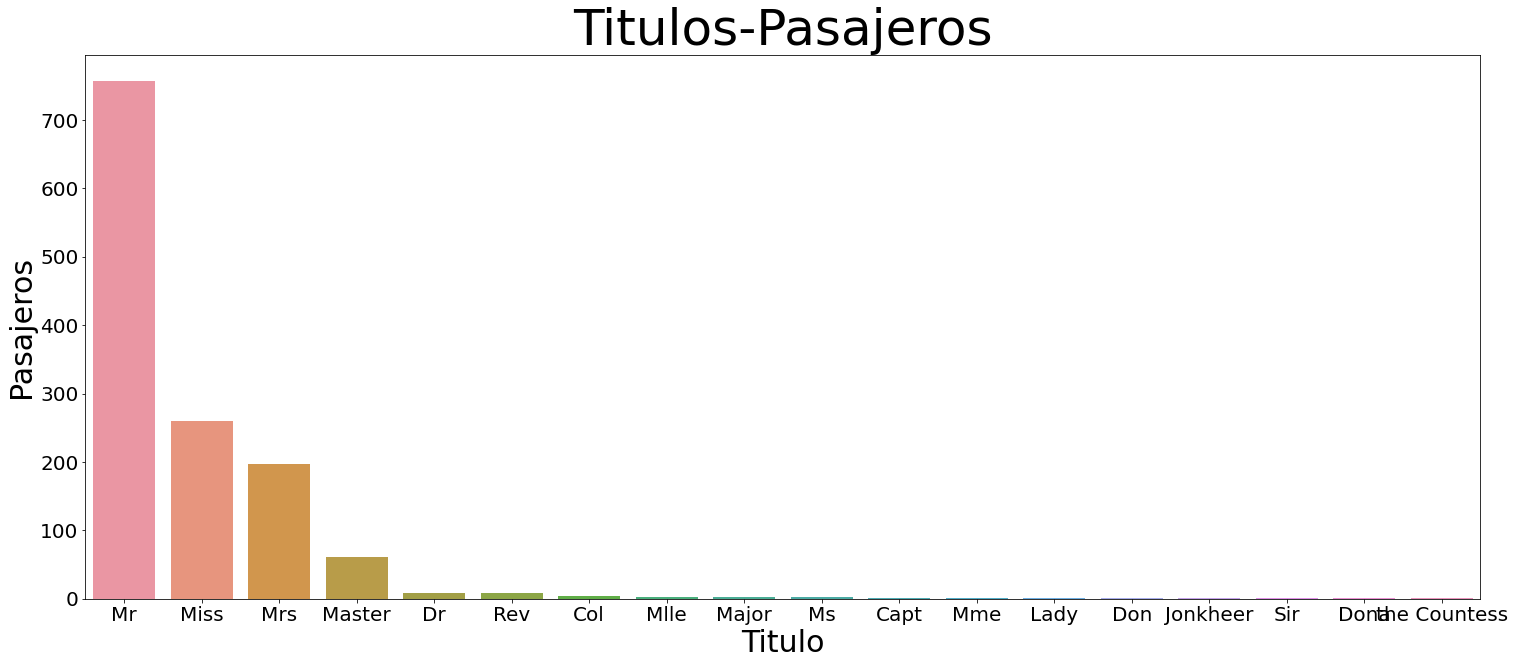

In [6]:
#Crea la columna titulo en base al nombre
for df in dfs:
    # data['Titulo']= data['Nombre'].str.extract(pat= ' ([A-Za-z]+)\.') --> Viejo codigo, sirve pero se entiende mejor el otro 😉
    df['Titulo'] = df['Nombre'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

# # Verifiar cuantos tipos de tilos se crearon
# df_train['Titulo'].unique()

# # Verifico si todos tienen titulos (descomentar para verificar) 
# train_nul =  pd.isnull(df_train['Titulo']).sum()
# train_dat = df_train['Titulo'].isna().count()
# print('Datos nulos:', train_nul)
# print('Total de datos:', train_dat)

# #Descomnetar para buscar algun dato en particular 
# buscar = df_all[df_all['Titulo'] == 'Mme']
# buscar

# Une la data de entrenamiento con la de test, se utiliza para sacar distintas caracteristicas de forma convinada
df_all = concat_df(df_train, df_test)

# Grafico sin tratamiento

#Tamaño grafico
plt.figure(figsize=(25, 10))
#varibles del grafico
sns.barplot(x= df_all['Titulo'].value_counts().index, y=df_all['Titulo'].value_counts().values)
#Titulo grafico
plt.title("Titulos-Pasajeros",fontsize=50)
#Tamaño y nombre de titulos ejes
plt.xlabel("Titulo", size = 30)
plt.ylabel("Pasajeros", size = 30)
#Tamaño letras ejes
plt.tick_params(labelsize=20)

# Para ver la tasa de supervivencia, segun titulo y edades

Tit_edad =df_all[['Titulo', 'Edad']].groupby(['Titulo'], as_index=False).agg(['count', 'mean', 'min', 'max' ])
Tit_Sob = df_all[['Titulo', 'Sobreviviente']].groupby(['Titulo'], as_index=False).agg(['mean'])
pd.merge(Tit_edad, Tit_Sob, on='Titulo')



Se observan varios titulos incorrectos y otros que pueden ser agrupados por tener caracteristicas similares, por lo que se planta una nueva distribucion de titulos. Adoptanse como titulos principales:
   * Mr: Hombres mayores de 12 años
   * Miss: mujeres no casadas
   * Mrs: mujeres casadas
   * Master:  título único para hombres menores de 12 años

Haciendose las siguientes sustituciones:
  * Ms y Mlle por Miss (en realidad Mlle es un nombre y por las caracerristicas de este pasajero se lo considera una Miss)
  * 'Mme, Countess, 'Lady,the Countess y Dona por Mrs
  * Mme, countess y lady por Mrs 
  * Los títulos de Dr, Col, Major, Jonkheer, Capt, Sir, Don y Rev se reemplazan por Mr (señor) porque esos pasajeros tienen características similares. 


        Edad                        
       count       mean    min   max
Titulo                              
Master    53   5.482642   0.33  14.5
Miss     213  21.824366   0.17  63.0
Mr       606  32.811056  11.00  80.0
Mrs      174  36.971264  14.00  76.0
       Sobreviviente
                mean
Titulo              
Master      0.575000
Miss        0.702703
Mr          0.161710
Mrs         0.796875


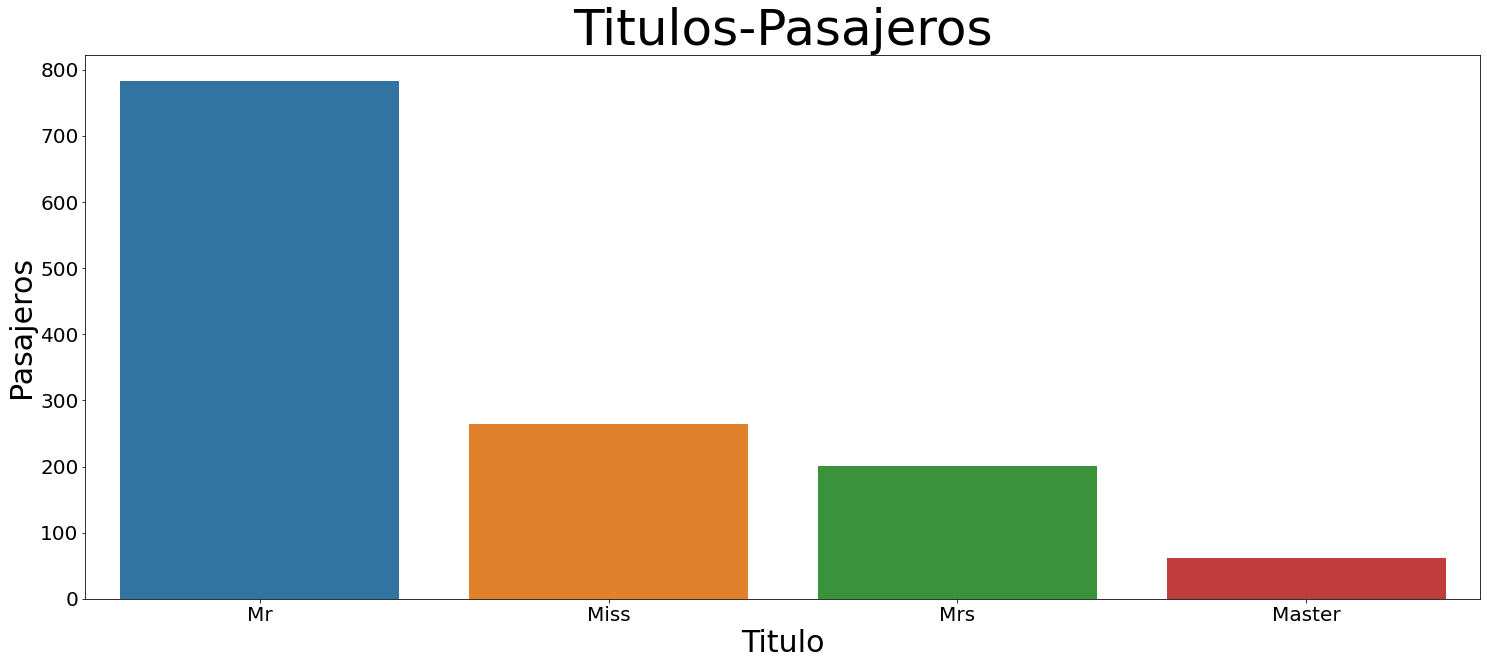

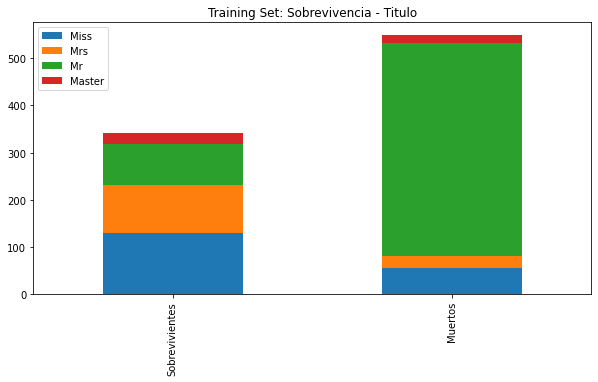

In [7]:
# Remplazo de valores
for df in dfs:
    df.Titulo=df.Titulo.replace(['Ms', 'Mlle'], 'Miss')
    df.Titulo=df.Titulo.replace(['Mme', 'Countess', 'Lady','the Countess', 'Dona'], 'Mrs')
    df.Titulo=df.Titulo.replace(['Dr', 'Rev', 'Sir', 'Col', 'Major',  'Capt', 'Jonkheer', 'Don'], 'Mr')
    
df_all = concat_df(df_train, df_test)

# Grafico con tratamiento

#Tamaño grafico
plt.figure(figsize=(25, 10))
#varibles del grafico
sns.barplot(x= df_all['Titulo'].value_counts().index, y=df_all['Titulo'].value_counts().values)
#Titulo grafico
plt.title("Titulos-Pasajeros",fontsize=50)
#Tamaño y nombre de titulos ejes
plt.xlabel("Titulo", size = 30)
plt.ylabel("Pasajeros", size = 30)
#Tamaño letras ejes
plt.tick_params(labelsize=20)

# Para ver la tasa de supervivencia, segun titulo y edades
print(df_all[['Titulo', 'Edad']].groupby(['Titulo'], as_index=False).agg(['count', 'mean', 'min', 'max' ]))
print(df_train[['Titulo', 'Sobreviviente']].groupby(['Titulo'], as_index=False).agg(['mean']))

# bar_chart(df_train, 'Titulo') # Funcion definida previamente
# Tit_edad =df_all[['Titulo', 'Edad']].groupby(['Titulo'], as_index=False).agg(['count', 'mean', 'min', 'max' ])
# Tit_Sob = df_all[['Titulo', 'Sobreviviente']].groupby(['Titulo'], as_index=False).agg(['mean'])
# pd.merge(Tit_edad, Tit_Sob, on='Titulo')

bar_chart(df_train, 'Titulo') # Funcion definida previamente

**Conclusiones:**  
    Se observa que para los titulos de mujeres la supervivencia varia en menos de un 10% variando entre 70 a 79% segun su titulo en cuanto a los hombres varia de un 57% a 16% la probabilidad de supervivencia

#### 4.1.2. Pareja
Dada la dificultad y la poca relevancia de dicha variable se decidio no tenerla en cuenta para este analisis. 

En caso de querer considerar dicha informacion se debe marcar de alguna forma los valores repetidos "par", de esta forma quedaran marcados quienes viajan con su pareja (Mr y Mrs). Algunas alternativas para hacerlo podrian ser:
   1. Buscar valores unicos y contarlos, despues crear una nueva columna que los marque (si el conte da 1 esta solo si el conteo da 2 esta con la pareja, si da distinto algo raro hay)
   2. Ordenar los valores alfabeticamente y cada valor chequear si se repite justo en la casilla anterior o la posterior, si lo hace marcar que esta con la pareja sino esta solo
   
   Se probaron los codigos de acontinuacion pero los resultados no fueron aceptables
   
   
Quedaron varios valores con contetino = "" seria vacio pero no marca Nan
Para verlos correr el sigueitne codigo


#Busca cuantas veces se repite un valor  
buscar = df_train[df_train['par'] == '']  
buscar

#Para contarlos  
len(buscar)




In [8]:
# # creaa una columana ("par") donde estan los nombres propios de las personas y en el caso de las casadas (Mrs) el nombre de su pareja
# parejas = df_train["Nombre"].str.split(".", n = 1, expand = True)[1].str.split("(", expand=True)
# df_train["par"]= parejas[0]

# df_train.par = df_train.par.str.strip() # Elimina espacios en blanco al principio y final

In [9]:
# #Cuando se verificio el numero de repiticiones de cada valor hubo valores muy extraños

# for data in df_train['par']:
#     buscar = df_train[df_train['par'] == data]
#     repeticiones = len(buscar)
#     print(repeticiones)

### 4.2. Edades
Se completan los datos faltantes de las edades en base al promedio de la edad de cada grupo segun su titulo y luego se dividiran los datos de las edades en distintos grupos de caracteristicas similares para que los valores extremos no alteren la serie.



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


        Edad                        
       count       mean    min   max
Titulo                              
Master    53   5.482642   0.33  14.5
Miss     213  21.824366   0.17  63.0
Mr       606  32.811056  11.00  80.0
Mrs      174  36.971264  14.00  76.0


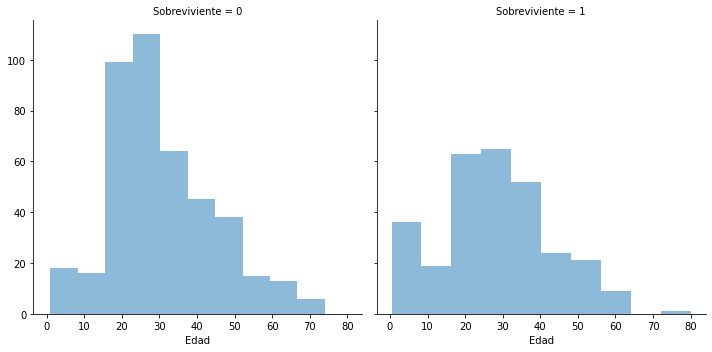

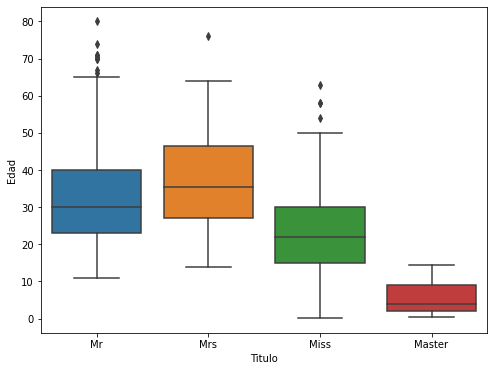

In [10]:
# Histograma
grid = sns.FacetGrid(df_train, col='Sobreviviente', size=5)
grid.map(plt.hist, 'Edad', alpha=.5, bins=10)
# TITULO TOTAL
# TITULO EJE VERTICAL

# Tabla con valores relevantes
df_all = concat_df(df_train, df_test)
print(df_all[['Titulo', 'Edad']].groupby(['Titulo'], as_index=False).agg(['count', 'mean', 'min', 'max' ]))

# Diagrama de Bigotes Edad-Titulo 
plt.figure(figsize=(8,6))
sns.boxplot(x='Titulo', y= 'Edad', data= df_all)



**No se considero ningun tratamiento especial para los valores atipicos.**

### 4.2.1. Completacion de datos faltantes
Si bien se vio una cierta relacion de la edad en base a los integrnates de la familia (hermanos e hijos), se considera aceptable completar los datos faltantes unicamente ne base a promedios de la edad promedio segun titulo

In [11]:
# Completar las edades en base a la edad promedio de los grupos en los titulos

df_all = concat_df(df_train, df_test)
df_train.Edad= df_all.groupby('Titulo')['Edad'].transform(lambda grp: grp.fillna(round(np.mean(grp), 0)))
df_test.Edad= df_all.groupby('Titulo')['Edad'].transform(lambda grp: grp.fillna(round(np.mean(grp), 0)))

## Descomentar para ver: 

##si cargo los datos de las edades
# print('Datos faltantes:')
# print(pd.isnull(df_train).sum())
# print(pd.isnull(df_test).sum())

# # Para filtrado de datos si hay que revisar algo

# Opcion 1
# df_train_mask=df_train['Titulo']== 'Master'
# positions = np.flatnonzero(df_train_mask)
# filtered_df=df_train.iloc[positions]
# filtered_df

# Opcion 2
# df_train[(df_train.Edad.notnull()) & (df_train.Titulo == 'Miss') & (df_train.Edad > 50)   ]



#### 4.2.2. Division en Rangos
Se agrupan las edades segun rangos considerados de caracteristicas similares, de forma tal que los valores extremos no afecten a la serie.

       Sobreviviente          
               count      mean
Edad                          
0-8               58  0.655172
8-15              29  0.448276
15-18             56  0.375000
18-25            198  0.383838
25-40            400  0.347500
40-60            128  0.390625
60-100            22  0.227273


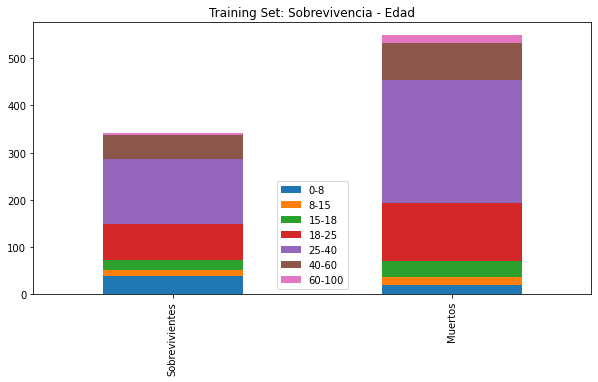

In [12]:
#Creo varios grupos de acuerdo a bandas de las edades
#Bandas: 0-8, 9-15, 16-18, 19-25, 26-40, 41-60, 61-100
bins = [0, 8, 15, 18, 25, 40, 60, 100]
names = ['0-8', '8-15', '15-18', '18-25', '25-40', '40-60', '60-100']
df_train['Edad'] = pd.cut(df_train['Edad'], bins, labels = names)
df_test['Edad'] = pd.cut(df_test['Edad'], bins, labels = names)


# Tabla para ver los % de muertos
print(df_train[['Edad', 'Sobreviviente']].groupby(['Edad'], as_index=False).agg(['count','mean']))


# LLama a la funcion para graficar la cantidad de muertos en base a los grupos de las edades
bar_chart(df_train,'Edad')




       Sobreviviente          
               count      mean
Edad                          
0-8               58  0.655172
8-15              29  0.448276
15-18             56  0.375000
18-25            198  0.383838
25-40            400  0.347500
40-60            128  0.390625
60-100            22  0.227273


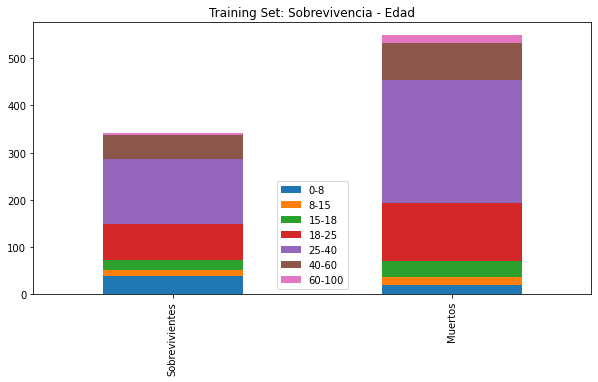

In [13]:

# Tabla para ver los % de muertos
print(df_train[['Edad', 'Sobreviviente']].groupby(['Edad'], as_index=False).agg(['count','mean']))


# LLama a la funcion para graficar la cantidad de muertos en base a los grupos de las edades
bar_chart(df_train,'Edad')

**Conlución**  
Se observa en los extremos que a medida que aumenta la edad las probabilidades de supervivencia se reducen sin embargo, pero rangos de edades entre 15 y 60 no se presenta un comportamiento tan claro

**Planteos que se podrían considerar del analisis**

¿Deberia hacer algún tratamiento a los valores extremos? 
¿Es correcto dividir las edades en rangos? Por que?

# Tamaño de familia
Se considera errado considerar el tambaño de la familia como la suma de los hermanos e hijos ya que si se observa dichas variables en la correlacion del  mapa de calor una de estas es inversamente proporcional a la sobrevivencia y la otra es proporcional. 


In [14]:
# #creando una nueva columna combinando hermanos e hijos
# for df in dfs:
#     df["TamFam"] = df["Hermanos"] + df["Hijos"]

# DUDAS
Es conveniente juntar familia e hijos como tamaño de familia y eliminar estas 2 columnas? Por que?

### 4.3. Embarque
Embarked es una característica categórica que indica en que puerto se embarcaron (C = Cherburgo; Q = Queenstown; S = Southampton) y solo hay 2 valores perdidos en todo el conjunto de datos. Ambos pasajeros son mujeres, de clase alta y tienen el mismo número de boleto. Esto significa que se conocen y embarcaron juntos desde el mismo puerto. El valor del modo Embarcado para una pasajera de clase alta es C (Cherburgo), pero esto no significa necesariamente que hayan embarcado desde ese puerto.

In [15]:
# Busqueda valores faltantes  de embarque (solo habia valores faltantes en la data de entrenamiento)
df_train[df_train['Embarque'].isnull()]


,Sin_nombre,ID,Sobreviviente,Clase,Nombre,Sexo,Edad,Hermanos,Hijos,Ticket,Tarifa,Cabina,Embarque,Titulo
61,61,62,1,1,"Icard, Miss. Amelie",female,25-40,0,0,113572,80.0,B28,NaN,Miss
829,829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,60-100,0,0,113572,80.0,B28,NaN,Mrs


Cuando busqué en Google a Stone, la Sra. George Nelson (Martha Evelyn), descubrí que se embarcó desde S (Southampton) con su criada Amelie Icard, en esta página [Martha Evelyn Stone: Titanic Survivor](https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html).

La Sra. Stone abordó el Titanic en Southampton el 10 de abril de 1912 y viajaba en primera clase con su criada Amelie Icard. Ocupaba la cabina B-28.

Los valores que faltan en Embarked se rellenan con S con esta información.

Sobreviviente          
                 count      mean
Embarque                        
C                  168  0.553571
Q                   77  0.389610
S                  646  0.339009

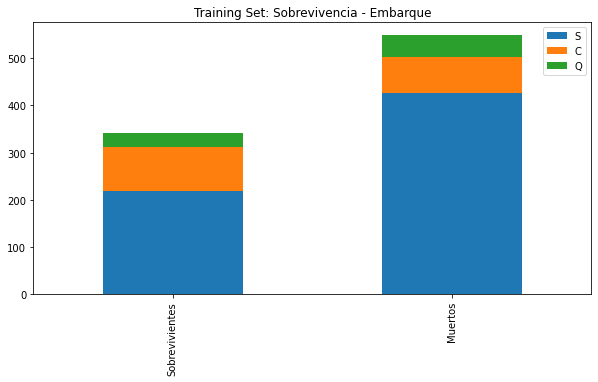

In [16]:
# Llenando los valores faltantes en Embarked con S
df_train['Embarque'] = df_train['Embarque'].fillna('S')

# LLama a la funcion para graficar la cantidad de muertos en base a los grupos de las edades
bar_chart(df_train,'Embarque')

# Tabla para ver los % de muertos
df_train[['Embarque', 'Sobreviviente']].groupby(['Embarque'], as_index=False).agg(['count','mean'])

**Conclusión:**  
Se observa que una gran relacion entre las probabildades de supervivencia y el puerto en que se embarco

### 4.4. Tarifa
Como se observa a continuacion solo hay un pasajero al que le falta el valor de la tarifa. Podemos suponer que Fare está relacionado con el tamaño de la familia (Parch y SibSp) y las características de Pclass. El valor medio de la tarifa de un hombre con un boleto de tercera clase y sin familia es una opción lógica para completar el valor que falta.

In [17]:
print(df_test[df_test['Tarifa'].isnull()]) # busca el valor nulo

med_tar = df_train.groupby(['Clase', 'Hermanos', 'Hijos']).Tarifa.median()[3][0][0]
# Completar el valor faltante en la tarifa con la tarifa mediana de un pasajero solo de tercera clase
df_test['Tarifa'] = df_test['Tarifa'].fillna(med_tar)

     Sin_nombre    ID  Clase              Nombre  Sexo   Edad  Hermanos  \
152         152  1044      3  Storey, Mr. Thomas  male  40-60         0   

     Hijos Ticket  Tarifa Cabina Embarque Titulo  
152      0   3701     NaN    NaN        S     Mr  


Como se observa a continuacion los valores de las tarifas se concentran en valores bajos, por lo que se considera apropiado vincularlos por rangos en base a la cantidad de valores 

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Tarifa, dtype: float64
       Sobreviviente          
               count      mean
Tarifa                        
0-5                2  0.000000
5-10             319  0.206897
10-15            122  0.385246
15-20             57  0.508772
20-30            142  0.443662
30-40             58  0.396552
40-60             54  0.574074
60-80             48  0.520833
80-100            21  0.857143
<100              53  0.735849

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


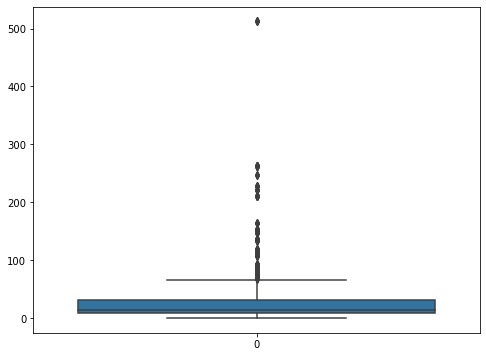

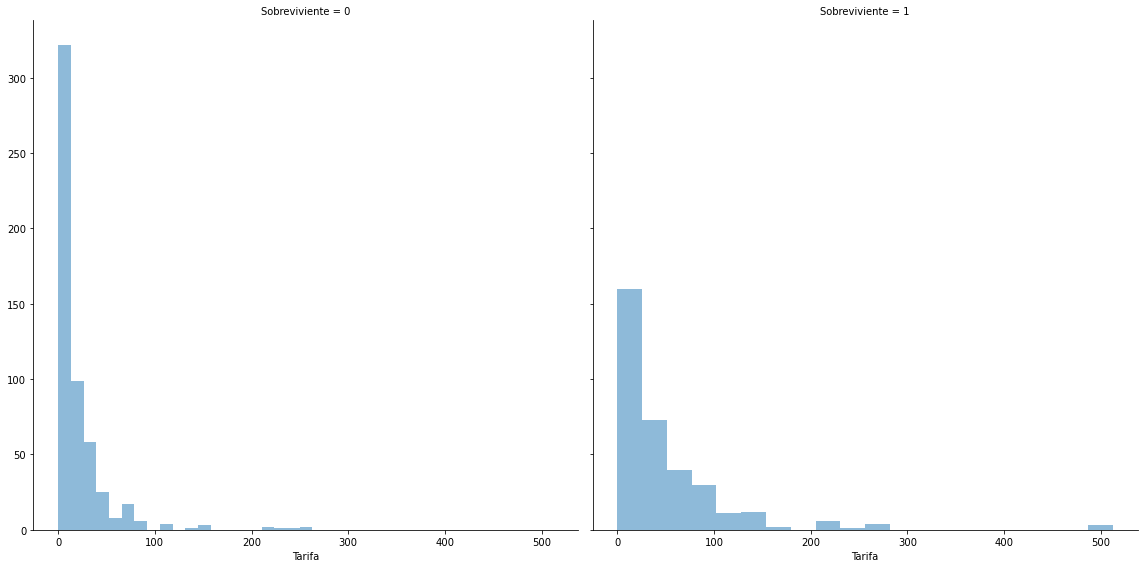

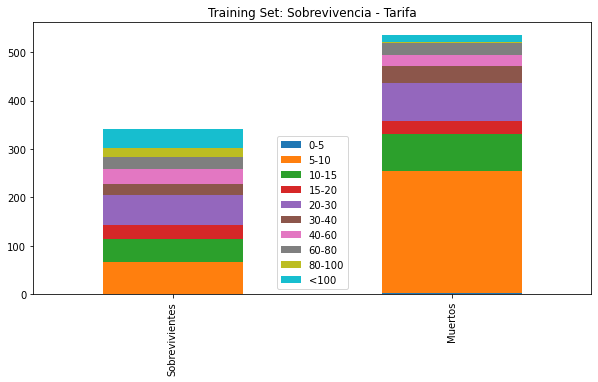

In [18]:
print(df_all['Tarifa'].describe())

# Diagrama de Bigotes Edad-Titulo 
plt.figure(figsize=(8,6))
sns.boxplot(data= df_all['Tarifa'])

# Histograma
grid = sns.FacetGrid(df_train, col='Sobreviviente', size=8)
grid.map(plt.hist, 'Tarifa', alpha=.5, bins=20)
# TITULO TOTAL
# TITULO EJE VERTICAL

# VER COMO DIVIDIRLO DE UNA FORMA MAS ADECUADA

#Creo varios grupos de acuerdo a bandas de las edades
bins = [0, 5, 10, 15, 20, 30, 40, 60,80,100, 99999]
names = ['0-5', '5-10', '10-15', '15-20', '20-30', '30-40', '40-60', '60-80', '80-100','<100']
df_train['Tarifa'] = pd.cut(df_train['Tarifa'], bins, labels = names)
df_test['Tarifa'] = pd.cut(df_test['Tarifa'], bins, labels = names)


# Tabla para ver los % de muertos
print(df_train[['Tarifa', 'Sobreviviente']].groupby(['Tarifa'], as_index=False).agg(['count','mean']))


# LLama a la funcion para graficar la cantidad de muertos en base a los grupos de las edades
bar_chart(df_train,'Tarifa')



**Conclusión**  
Se observa que en general los pasajeros que pagaron mayores tarifas suelen terner mas probabilidad de supervivencia

### 4.5. Cabina
La característica de la cabina es un poco complicada y necesita más exploración. Falta la gran parte de la función de cabina y la función en sí no se puede ignorar por completo porque algunas de las cabañas pueden tener tasas de supervivencia más altas. Resulta que la primera letra de los valores de Cabina son las cubiertas en las que se ubican las cabinas. Esas cubiertas estaban separadas principalmente para una clase de pasajeros, pero algunas de ellas fueron utilizadas por varias clases de pasajeros.


![](Titanic_cabin.PNG)

   * En la cubierta del barco había 6 habitaciones etiquetadas como T, U, W, X, Y, Z pero solo la cabina T está presente en el conjunto de datos
   * Las cubiertas A, B y C eran solo para pasajeros de primera clase.
   * Las cubiertas D y E eran para todas las clases.
   * Las cubiertas F y G eran para pasajeros de 2da y 3ra clase
   * De ir de A a G, la distancia a la escalera aumenta, lo que podría ser un factor de supervivencia.

# Poner grafico de distribucion pasajeros clase

Caracteristicas de los pasajeros segun clase y cubierta:
   * El 100% de las cubiertas A, B y C son pasajeros de 1ra clase.
   * La cubierta D tiene un 87% de pasajeros de primera clase y un 13% de pasajeros de segunda clase
   * La cubierta E tiene 83% de pasajeros de primera clase, 10% de segunda clase y 7% de pasajeros de tercera clase
   * La cubierta F tiene un 62% de pasajeros de 2da clase y un 38% de pasajeros de 3ra clase
   * El 100% de la cubierta G son pasajeros de tercera clase.
   * Hay una persona en la cubierta del barco en la cabina T y es un pasajero de primera clase. El pasajero de la cabina T tiene el mayor parecido con los pasajeros de la cubierta A, por lo que se agrupa con la cubierta A
   * Los pasajeros etiquetados como M son los valores que faltan en la función Cabina. No creo que sea posible encontrar la cubierta real de esos pasajeros, así que decidí usar M como una cubierta.

Valores unicicos de Training Set:  ['M' 'C' 'E' 'G' 'D' 'A' 'B' 'F']
Valores unicicos de Test Set:  ['M' 'B' 'E' 'A' 'C' 'D' 'F' 'G']
Valores unicicos de Training Set: 
 M      687
ABC    122
DE      65
FG      17
Name: Deck, dtype: int64
Valores unicicos de Test Set: 
 M      327
ABC     60
DE      22
FG       9
Name: Deck, dtype: int64
     Sobreviviente          
             count      mean
Deck                        
ABC            122  0.631148
DE              65  0.753846
FG              17  0.588235
M              687  0.299854


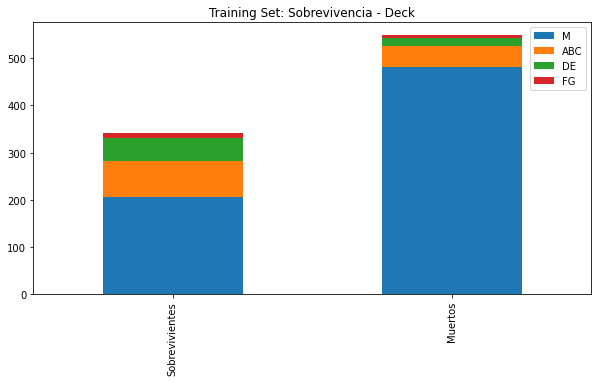

In [19]:
# Creación de la columna Deck a partir de la primera letra de la columna Cabin (M significa Missing)

for df in dfs:
    df['Deck'] = df['Cabina'].apply(lambda s: s[0] if pd.notnull(s) else 'M')

    # Remplazo de deck en el pasajero en la cabina T
    df_train['Deck'].replace(['T'],['A'],inplace=True) 
    
    print('Valores unicicos de {}:  {}'.format(  df.name,df['Deck'].unique() ) )


for df in dfs:
    df['Deck'] = df['Deck'].replace(['A', 'B', 'C'], 'ABC')
    df['Deck'] = df['Deck'].replace(['D', 'E'], 'DE')
    df['Deck'] = df['Deck'].replace(['F', 'G'], 'FG')

    print('Valores unicicos de {}: \n {}'.format(  df.name,df['Deck'].value_counts() ) )
    
# LLama a la funcion para graficar la cantidad de muertos en base al Deck
bar_chart(df_train,'Deck')

# Tabla para ver los % de muertos
print(df_train[['Deck', 'Sobreviviente']].groupby(['Deck'], as_index=False).agg(['count','mean']))


Se observa las siguientes probabilidades de supervivencia segun el Deck:  
ABC:            0.631148  
DE:             0.753846  
FG:             0.588235  
M:              0.299854  

## 4.B. Preparación de los datos para el uso de los algoritmos. 
Se ponene los datos en formato numerico para que los distintos modelos funcionen adecuadamente y se observa la correlación entre cada valor en un mapa de calor

In [20]:
df_train.head()

,Sin_nombre,ID,Sobreviviente,Clase,Nombre,Sexo,Edad,Hermanos,Hijos,Ticket,Tarifa,Cabina,Embarque,Titulo,Deck
0,0,1,0,3,"Braund, Mr. Owen Harris",male,18-25,1,0,A/5 21171,5-10,NaN,S,Mr,M
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,25-40,1,0,PC 17599,60-80,C85,C,Mrs,ABC
2,2,3,1,3,"Heikkinen, Miss. Laina",female,25-40,0,0,STON/O2. 3101282,5-10,NaN,S,Miss,M
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,25-40,1,0,113803,40-60,C123,S,Mrs,ABC
4,4,5,0,3,"Allen, Mr. William Henry",male,25-40,0,0,373450,5-10,NaN,S,Mr,M


In [21]:
#PONER MAS PROLIJO, CON UN CICLO FOR

# Columnas a cambiar formato: Sexo, Edad, Embarque, Deck 
# Columnas a borrar: sin nombre, ID (solo para train), nombre, Ticket, Cabina, Titulo 


for df in dfs:
    Replace_val(df, 'Embarque')
    Replace_val(df, 'Deck')
    Replace_val(df, 'Titulo')
    Replace_val(df, 'Tarifa')
    Replace_val(df, 'Edad')
    Replace_val(df, 'Sexo')

#Cambio los datos de sexos en números    VER SI SE CAMBIO ANTES, COMO Y PORQUE
# df_train['Sexo'].replace(['female','male'],[0,1],inplace=True)
# df_test['Sexo'].replace(['female','male'],[0,1],inplace=True)


# #Cambio los datos de Edad en números
# df_train['Edad'].replace( ['0-8', '8-15', '15-18', '18-25', '25-40', '40-60', '60-100'],[0,1,2,3,4,5,6],inplace=True)
# df_test['Edad'].replace(['0-8', '8-15', '15-18', '18-25', '25-40', '40-60', '60-100'],[0,1,2,3,4,5,6],inplace=True)


# #Cambio los datos de embarque en números
# df_train['Embarque'].replace(['Q','S', 'C'],[0,1,2],inplace=True)
# df_test['Embarque'].replace(['Q','S', 'C'],[0,1,2],inplace=True)


# #Cambio los datos de embarque en números
# df_train['Deck'].replace(['M','ABC', 'DE', 'FG'],[0,1,2,3],inplace=True)
# df_test['Deck'].replace(['M','ABC', 'DE', 'FG'],[0,1,2,3],inplace=True)




#Elimino las columnas que considero que no son necesarias para el analisis
df_train = df_train.drop(["Sin_nombre",'ID','Nombre','Ticket', 'Cabina' ], axis=1)
df_test = df_test.drop(["Sin_nombre",'Nombre','Ticket', 'Cabina'], axis=1)



Text(0.5, 1.0, 'Relaciones entre las variables numericas')

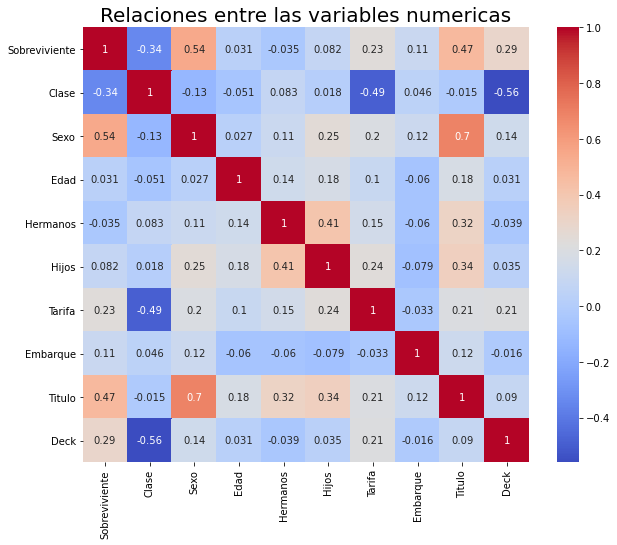

In [22]:
# Hace una correlacion de variables con un mapa de calor: 
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Relaciones entre las variables numericas', fontsize = 20)

**CONCLUSIONES**  
En el mapa se obserba que bajo la relacion entre la edad y la sobrevivencia **SE DEBE VER QUE PASO AHI, PARECE QUE SE EL TRATAMIENTO APLICADO NO FUE ADECUADO**, idem para tarifa

## 5. APLICACION DE ALGORITMOS DE MACHINE LERNING

In [23]:
#Separo la columna con la información de los sobrevivientes
X = np.array(df_train.drop(['Sobreviviente'], 1))
y = np.array(df_train['Sobreviviente'])

#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### 6.1. La Regresión Logística
Es un método estadístico para predecir clases binarias. El resultado o variable objetivo es de naturaleza dicotómica. Dicotómica significa que solo hay dos clases posibles. Por ejemplo, se puede utilizar para problemas de detección de cáncer o calcular la probabilidad de que ocurra un evento.

La Regresión Logística es uno de los algoritmos de Machine Learning más simples y más utilizados para la clasificación de dos clases. Es fácil de implementar y se puede usar como línea de base para cualquier problema de clasificación binaria. La Regresión Logística describe y estima la relación entre una variable binaria dependiente y las variables independientes.

![Nombre_imagen](Regresion_logistica.jpg)

In [24]:
##Regresión logística
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred1 = logreg.predict(X_test)

prec_RL = logreg.score(X_train, y_train)
print('Precisión Regresión Logística:')
print(prec_RL)

# Matriz de Confusión
matriz1 = confusion_matrix(y_test, Y_pred1)
print('Matriz de Confusión:')
print(matriz1)

Precisión Regresión Logística:
0.824438202247191
Matriz de Confusión:
[[95 10]
 [18 56]]


## 6.2. Algoritmo de vectores de soporte o Support Vector Machine
Es un clasificador discriminatorio definido formalmente por un hiperplano de separación. En otras palabras, dados los datos de entrenamiento etiquetados el algoritmo genera un hiperplano óptimo que clasifica los nuevos ejemplos en dos espacios dimensionales, este hiperplano es una linea que divide un plano en dos partes donde en cada clase se encuentra en cada lado.

![](Support_Vector_Machine.jpg)

In [25]:
##Support Vector Machines
svc = SVC()
svc.fit(X_train, y_train)
Y_pred2 = svc.predict(X_test)

prec_SV = svc.score(X_train, y_train)
print('Precisión Soporte de Vectores:')
print(prec_SV )

# Matriz de Confusión
matriz2 = confusion_matrix(y_test, Y_pred2)
print('Matriz de Confusión:')
print(matriz2)

Precisión Soporte de Vectores:
0.8286516853932584
Matriz de Confusión:
[[95 10]
 [16 58]]


## 6.3. Algoritmo K neighbors (KNN)
Es uno de los algoritmos de clasificación más simples, incluso con tal simplicidad puede dar resultados altamente competitivos. Pertenece al dominio de aprendizaje supervisado y puede ser utilizado para el reconocimiento de patrones, extracción de datos y detección de intrusos.

Este consiste en seleccionar un valor de K. Al momento del análisis los K datos más cercanos al valor que se desea predecir será la solución.

![Nombre_imagen](K_neighbors.jpg)


In [26]:
##K neighbors
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred3 = knn.predict(X_test)

prec_KNN = knn.score(X_train, y_train)
print('Precisión Vecinos más Cercanos:')
print(prec_KNN)

# Matriz de Confusión
matriz3 = confusion_matrix(y_test, Y_pred3)
print('Matriz de Confusión:')
print(matriz3)

Precisión Vecinos más Cercanos:
0.8665730337078652
Matriz de Confusión:
[[91 14]
 [14 60]]


## 6.4. Naive Bayes
Es uno de los algoritmos más simples y poderosos para la clasificación basado en el Teorema de Bayes con una suposición de independencia entre los predictores. Asume  que el efecto de una característica particular en una clase es independiente de otras características. Esta suposición simplifica la computación, y por eso se considera ingenua. Esta suposición se denomina independencia condicional de clase.  
La formula del teorema de Bayes es la siguiente:  
P(h\D)   =    (  P(D\h)P(h)   )     /     P(D)  
- P(h): probabilidad previa de h, es la probabilidad de que la hipótesis h sea cierta.  
- P(D): probabilidad previa, es la probabilidad de los datos   
- P(h|D): probabilidad posterior, es la probabilidad de la hipótesis h dada los datos D.  
- P(D|h): es la probabilidad de los datos d dado que la hipótesis h era cierta. 
 


In [27]:
##Naive Bayes
GaussNB = GaussianNB()
GaussNB.fit(X_train, y_train)
Y_pred4 = GaussNB.predict(X_test)

prec_GaussNB = GaussNB.score(X_train, y_train)
print('Gaussian Naive Bayes:')
print(prec_GaussNB)

# Matriz de Confusión
matriz4 = confusion_matrix(y_test, Y_pred4)
print('Matriz de Confusión:')
print(matriz4)

Gaussian Naive Bayes:
0.8089887640449438
Matriz de Confusión:
[[87 18]
 [14 60]]


## 6.5. Árbol de decisión
Este algoritmo consiste en un diagrama de flujo, donde cada nivel es una pregunta con una respuesta de si o no. Eventualmente una respuesta te dará una solución al problema inicial. 
Un árbol de decisión tiene una estructura similar a un diagrama de flujo donde un nodo interno representa una característica o atributo, la rama representa una regla de decisión y cada nodo u hoja representa el resultado. El nodo superior de un árbol de decisión se conoce como nodo raíz.  
La medida de selección de atributos es una heurística (arte o la ciencia del descubrimiento) para seleccionar el criterio de división que divide los datos de la mejor manera posible. También se conoce como reglas de partición porque nos ayuda a determinar puntos de ruptura para conjunto en un nodo dado.

![Nombre_imagen](Arbol_de_decision.png)  
    
**Chequear que no haya sobreajuste**

In [28]:
from sklearn.tree import DecisionTreeClassifier
##Arbol de decisión
ArbDes = DecisionTreeClassifier(criterion = 'entropy')
ArbDes.fit(X_train, y_train)
Y_pred5 = ArbDes.predict(X_test)

prec_ArbDes = ArbDes.score(X_train, y_train)
print('Árbol de decisión:')
print(prec_ArbDes)

# Matriz de Confusión
matriz5 = confusion_matrix(y_test, Y_pred5)
print('Matriz de Confusión:')
print(matriz5)

Árbol de decisión:
0.9101123595505618
Matriz de Confusión:
[[94 11]
 [20 54]]


## 6.6. Bosque Aleatorio
Los Bosques Aleatorios crea árboles de decisión a partir de muestras de datos seleccionados al azar, obtiene predicciones de cada árbol y selecciona la mejor solución mediante votación.Técnicamente es un método de conjunto, basado en el enfoque de dividir y conquistar, de árboles de decisión generados en un conjunto de datos dividido al azar. Los árboles de decisión individuales se generan utilizando un indicador de selección de atributos, como la ganancia de información, la relación de ganancia y el índice Gini, para cada atributo. Cada árbol depende de una muestra aleatoria independiente. En un problema de clasificación, cada árbol vota y se elige la clase más popular como resultado final.

In [29]:
from sklearn.ensemble import RandomForestClassifier
##Bosque Aleatorio
BosAle = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
BosAle.fit(X_train, y_train)
Y_pred6 = BosAle.predict(X_test)

prec_BosAle = BosAle.score(X_train, y_train)
print('Bosque Aleatorio:')
print(prec_BosAle)

# Matriz de Confusión
matriz6 = confusion_matrix(y_test, Y_pred6)
print('Matriz de Confusión:')
print(matriz6)


Bosque Aleatorio:
0.9030898876404494
Matriz de Confusión:
[[93 12]
 [18 56]]


## 6.7. Metodo de ensamble
Comprar los valores obtenidos de los metodos y adoptar el valor que tomen la mayoria. Ver como plantear


In [38]:
print("""Resumen: \n  
Precisión Regresión Logística:""")
print(prec_RL)
print("Precisión Soporte de Vectores:")
print(prec_SV)
print("Precisión Vecinos más Cercanos:")
print(prec_KNN)
print('Gaussian Naive Bayes:')
print(prec_GaussNB)
print('Árbol de decisión:')
print(prec_ArbDes)
print('Bosque Aleatorio:')
print(prec_BosAle)
print('evc:')
print(prec_evc)



Resumen: 
  
Precisión Regresión Logística:
0.824438202247191
Precisión Soporte de Vectores:
0.8286516853932584
Precisión Vecinos más Cercanos:
0.8665730337078652
Gaussian Naive Bayes:
0.8089887640449438
Árbol de decisión:
0.9101123595505618
Bosque Aleatorio:
0.9030898876404494
evc:
0.9030898876404494


In [31]:
#importasion de funciones de Sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier 
from sklearn.metrics import confusion_matrix


evc = VotingClassifier(
    estimators=[('lr', LogisticRegression()),
                ('svc', SVC()),
                ('KNC',KNeighborsClassifier()),
                ('gnb', GaussianNB()),
                ('dtc', DecisionTreeClassifier()),
                ('rf', RandomForestClassifier())],
    voting='hard')
evc.fit(X_train, y_train)
Y_pred7 = evc.predict(X_test)
    
prec_evc = BosAle.score(X_train, y_train)
print('evc:')
print(prec_evc)

# Matriz de Confusión
matriz7 = confusion_matrix(y_test, Y_pred7)
print('Matriz de Confusión:')
print(matriz7)



evc:
0.9030898876404494
Matriz de Confusión:
[[96  9]
 [18 56]]


## 6. PREDICCIONES UTILIZANDO LOS MODELOS

In [34]:
ids = df_test['ID']

In [ ]:
def submission(test, model):
    y_pred=model.predict(test)
    data={'PassengerId': gender_submission['PassengerId'],'Survived':y_pred}
    result=pd.DataFrame(data)
    #date=pd.Timestamp.now().strftime(format='%d_%m_%Y_%H-%M_')
    result.to_csv(f'/kaggle/working/pipeline_result.csv', index=False)
    
    

In [41]:
##Arbol de desicion
prediccion_ArbDes = ArbDes.predict(df_test.drop('ID', axis=1))
out_ArbDes = pd.DataFrame({ 'ID' : ids, 'Sobreviviente': prediccion_ArbDes })
print('Predicción Árbol de desición:')
print(out_svc.head())

#Guardado resultados
result=pd.DataFrame(out_svc)
result.to_csv('sobrevivientes.csv', index=False)

Predicción Árbol de desición:
    ID  Sobreviviente
0  892              0
1  893              1
2  894              0
3  895              0
4  896              1


In [35]:
##Regresión logística
prediccion_logreg = logreg.predict(df_test.drop('ID', axis=1))
out_logreg = pd.DataFrame({ 'ID' : ids, 'Sobreviviente': prediccion_logreg })
print('Predicción Regresión Logística:')
print(out_logreg.head())

Predicción Regresión Logística:
    ID  Sobreviviente
0  892              0
1  893              0
2  894              0
3  895              0
4  896              0


In [36]:
##Support Vector Machines
prediccion_svc = svc.predict(df_test.drop('ID', axis=1))
out_svc = pd.DataFrame({ 'ID' : ids, 'Sobreviviente': prediccion_svc })
print('Predicción Soporte de Vectores:')
print(out_svc.head())



Predicción Soporte de Vectores:
    ID  Sobreviviente
0  892              0
1  893              1
2  894              0
3  895              0
4  896              1


In [37]:
##K neighbors
prediccion_knn = knn.predict(df_test.drop('ID', axis=1))
out_knn = pd.DataFrame({ 'ID' : ids, 'Sobreviviente': prediccion_knn })
print('Predicción Vecinos más Cercanos:')
print(out_knn.head())

Predicción Vecinos más Cercanos:
    ID  Sobreviviente
0  892              0
1  893              1
2  894              0
3  895              0
4  896              1
